In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
prime_df = pd.read_csv('yellow_tripdata_2019-01.csv')

In [4]:
zones_df = pd.read_csv('zone_lookup.csv', index_col = 'LocationID')

In [5]:
zones_df.head()

,Borough,Zone,service_zone
LocationID,,,
1,EWR,Newark Airport,EWR
2,Queens,Jamaica Bay,Boro Zone
3,Bronx,Allerton/Pelham Gardens,Boro Zone
4,Manhattan,Alphabet City,Yellow Zone
5,Staten Island,Arden Heights,Boro Zone


In [6]:
zones_df.index.size

265

In [7]:
zones_df.index.values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [8]:
zones_df.loc[[1]]

,Borough,Zone,service_zone
LocationID,,,
1,EWR,Newark Airport,EWR


In [9]:
prime_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


### Removing not important columns

In [10]:
prime_df.drop(columns = ['VendorID','RatecodeID','store_and_fwd_flag','payment_type','extra','mta_tax','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge'], inplace = True)

In [11]:
prime_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,151,239,7.0,1.65
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,239,246,14.0,1.00
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,236,236,4.5,0.00
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,193,193,3.5,0.00
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,193,193,52.0,0.00


Now the dataframe 'prime_df' has only required columns

In [12]:
prime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   passenger_count        int64  
 3   trip_distance          float64
 4   PULocationID           int64  
 5   DOLocationID           int64  
 6   fare_amount            float64
 7   tip_amount             float64
dtypes: float64(3), int64(3), object(2)
memory usage: 468.0+ MB


## Changing time into datetime format

In [13]:
prime_df['pickup_time'] = pd.to_datetime(prime_df['tpep_pickup_datetime'])

In [14]:
prime_df['dropoff_time'] = pd.to_datetime(prime_df['tpep_dropoff_datetime'])

In [15]:
prime_df.drop(columns = ['tpep_pickup_datetime','tpep_dropoff_datetime'], inplace = True)

In [16]:
prime_df.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,pickup_time,dropoff_time
0,1,1.5,151,239,7.0,1.65,2019-01-01 00:46:40,2019-01-01 00:53:20
1,1,2.6,239,246,14.0,1.00,2019-01-01 00:59:47,2019-01-01 01:18:59
2,3,0.0,236,236,4.5,0.00,2018-12-21 13:48:30,2018-12-21 13:52:40
3,5,0.0,193,193,3.5,0.00,2018-11-28 15:52:25,2018-11-28 15:55:45
4,5,0.0,193,193,52.0,0.00,2018-11-28 15:56:57,2018-11-28 15:58:33


In [17]:
prime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   passenger_count  int64         
 1   trip_distance    float64       
 2   PULocationID     int64         
 3   DOLocationID     int64         
 4   fare_amount      float64       
 5   tip_amount       float64       
 6   pickup_time      datetime64[ns]
 7   dropoff_time     datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(3)
memory usage: 468.0 MB


## Analysis based on Pickup Hour

In [18]:
PU_hour_df = prime_df.copy()

In [19]:
from datetime import datetime as dt

In [20]:
PU_hour_df['PU_hour'] = PU_hour_df['pickup_time'].dt.hour

In [21]:
PU_hour_df.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,pickup_time,dropoff_time,PU_hour
0,1,1.5,151,239,7.0,1.65,2019-01-01 00:46:40,2019-01-01 00:53:20,0
1,1,2.6,239,246,14.0,1.00,2019-01-01 00:59:47,2019-01-01 01:18:59,0
2,3,0.0,236,236,4.5,0.00,2018-12-21 13:48:30,2018-12-21 13:52:40,13
3,5,0.0,193,193,3.5,0.00,2018-11-28 15:52:25,2018-11-28 15:55:45,15
4,5,0.0,193,193,52.0,0.00,2018-11-28 15:56:57,2018-11-28 15:58:33,15


Calculate the drivers pay as the sum of the fare_amount and the tip_amount.

In [22]:
PU_hour_df['Pay'] = PU_hour_df['fare_amount']+PU_hour_df['tip_amount']

In [23]:
PU_hour_df.drop(columns = ['fare_amount','tip_amount'], inplace = True)

In [24]:
PU_hour_df.drop(columns = ['passenger_count','DOLocationID'], inplace = True)

Calculate the trip time in and then convert it to seconds.

In [25]:
PU_hour_df['trip_time'] = PU_hour_df['dropoff_time'] - PU_hour_df['pickup_time']

In [26]:
PU_hour_df['trip_time'] = PU_hour_df['trip_time'].dt.total_seconds()

In [27]:
PU_hour_df.head()

,trip_distance,PULocationID,pickup_time,dropoff_time,PU_hour,Pay,trip_time
0,1.5,151,2019-01-01 00:46:40,2019-01-01 00:53:20,0,8.65,400.0
1,2.6,239,2019-01-01 00:59:47,2019-01-01 01:18:59,0,15.00,1152.0
2,0.0,236,2018-12-21 13:48:30,2018-12-21 13:52:40,13,4.50,250.0
3,0.0,193,2018-11-28 15:52:25,2018-11-28 15:55:45,15,3.50,200.0
4,0.0,193,2018-11-28 15:56:57,2018-11-28 15:58:33,15,52.00,96.0


In [28]:
PU_hour_df.trip_time.describe()

count    7.667792e+06
mean     9.888731e+02
std      4.908903e+03
min     -5.056830e+06
25%      3.660000e+02
50%      6.090000e+02
75%      9.940000e+02
max      2.618881e+06
Name: trip_time, dtype: float64

In [29]:
PU_hour_df.shape

(7667792, 7)

Trip time cannot be less than 0. I also dropped the trips that have 0 seconds trip time.

In [30]:
PU_hour_filtered_df = PU_hour_df[PU_hour_df['trip_time'] > 0]

In [31]:
PU_hour_filtered_df.shape

(7661498, 7)

Change naming for convinience. (Simply changing the pointer)

In [32]:
PU_hour_df = PU_hour_filtered_df

In [33]:
PU_hour_df['pay_rate'] = 3600*PU_hour_df['Pay']/PU_hour_df['trip_time'] #Pay rate is calculated as pay per hour

In [34]:
PU_hour_df.head()

,trip_distance,PULocationID,pickup_time,dropoff_time,PU_hour,Pay,trip_time,pay_rate
0,1.5,151,2019-01-01 00:46:40,2019-01-01 00:53:20,0,8.65,400.0,77.850
1,2.6,239,2019-01-01 00:59:47,2019-01-01 01:18:59,0,15.00,1152.0,46.875
2,0.0,236,2018-12-21 13:48:30,2018-12-21 13:52:40,13,4.50,250.0,64.800
3,0.0,193,2018-11-28 15:52:25,2018-11-28 15:55:45,15,3.50,200.0,63.000
4,0.0,193,2018-11-28 15:56:57,2018-11-28 15:58:33,15,52.00,96.0,1950.000


In [35]:
len(PU_hour_df['PULocationID'].unique())

263

In [36]:
hourly_pay_rates = PU_hour_df.groupby(['PU_hour'])['pay_rate'].mean()

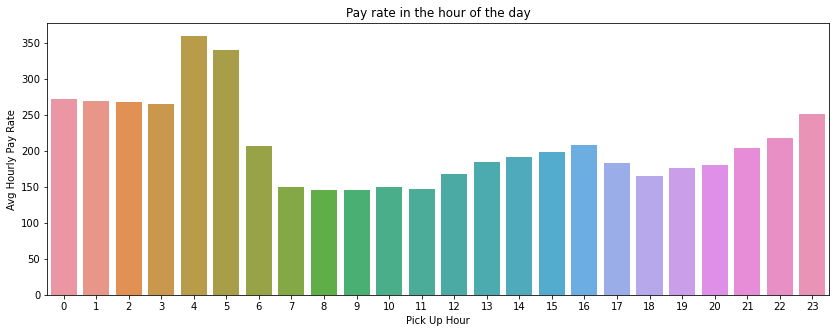

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hourly_pay_rates.index, hourly_pay_rates, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('Avg Hourly Pay Rate')
_ = ax.set_title('Pay rate in the hour of the day')

In [38]:
PU_loc_pay_rates = PU_hour_df.groupby(['PULocationID'])['pay_rate'].mean()

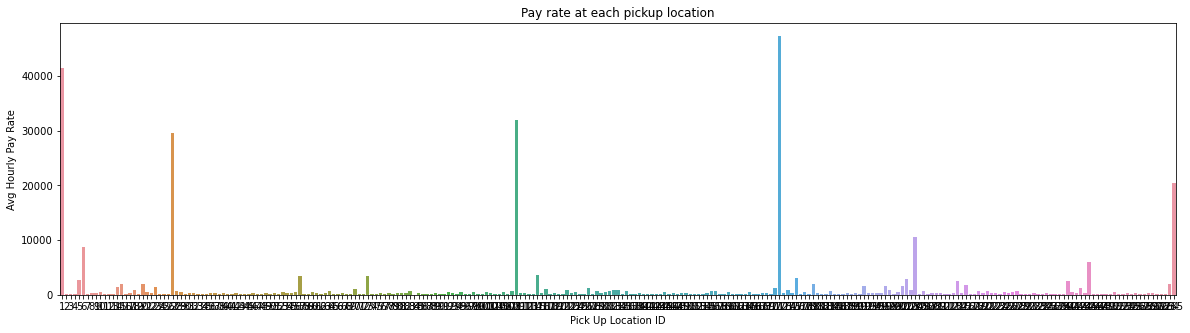

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))
_ = sns.barplot(PU_loc_pay_rates.index, PU_loc_pay_rates, ax = ax)
ax.set_xlabel('Pick Up Location ID')
ax.set_ylabel('Avg Hourly Pay Rate')
_ = ax.set_title('Pay rate at each pickup location')

In [40]:
PU_loc_pay_rates.head()

PULocationID
1    41348.542556
2      123.109464
3       72.995193
4      152.231594
5     2666.996052
Name: pay_rate, dtype: float64

In [41]:
pay_threshold =1000 #To pick the pay_threshold I use the "pay_rate" rather than the "drivers_pay  "

good_PU_locations = PU_loc_pay_rates[PU_loc_pay_rates >= pay_threshold]

In [42]:
good_PU_locations.shape

(30,)

In [43]:
good_PU_locations.index

Int64Index([  1,   5,   6,  14,  15,  20,  23,  27,  57,  70,  73, 109, 115,
            127, 171, 172, 176, 180, 192, 197, 201, 202, 204, 214, 216, 240,
            243, 245, 264, 265],
           dtype='int64', name='PULocationID')

In [44]:
zones_df.loc[good_PU_locations.index].shape

(30, 3)

In [45]:
good_zones_df = zones_df.loc[good_PU_locations.index].dropna()

In [46]:
good_zones_df.head()

,Borough,Zone,service_zone
PULocationID,,,
1,EWR,Newark Airport,EWR
5,Staten Island,Arden Heights,Boro Zone
6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
14,Brooklyn,Bay Ridge,Boro Zone
15,Queens,Bay Terrace/Fort Totten,Boro Zone


## Predicting the Drivers' Pay using all data

In [47]:
X = PU_hour_df[['trip_distance','trip_time']]

In [48]:
Y = PU_hour_df[['Pay']]

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7661498 entries, 0 to 7667791
Data columns (total 2 columns):
 #   Column         Dtype  
---  ------         -----  
 0   trip_distance  float64
 1   trip_time      float64
dtypes: float64(2)
memory usage: 175.4 MB


In [50]:
X.head()

,trip_distance,trip_time
0,1.5,400.0
1,2.6,1152.0
2,0.0,250.0
3,0.0,200.0
4,0.0,96.0


In [51]:
Y.head()

,Pay
0,8.65
1,15.00
2,4.50
3,3.50
4,52.00


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=1)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regress_linear_general = LinearRegression()

In [56]:
regress_linear_general.fit(X_train,Y_train)

LinearRegression()

In [57]:
Y_hat = regress_linear_general.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
print('Coefficients: \n', regress_linear_general.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_hat))
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_hat))

Coefficients: 
 [[3.05242834e+00 4.24373998e-05]]
Mean squared error: 33.91
Coefficient of determination: 0.79


In [60]:
def hourly_correlation(X_hour):
    X = X_hour[['trip_distance','trip_time']]
    Y = X_hour[['Pay']]
    
    if X.shape[0] < 5:
        return np.nan,np.nan
    
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)
    
    
    
    regr = LinearRegression()
    regr.fit(X_train,Y_train)
    
    Y_hat = regr.predict(X_test)
    
    return mean_squared_error(Y_test, Y_hat),r2_score(Y_test, Y_hat)

In [61]:
mse_list = []
r2_list = []
hour = []

for i in range(24):
    X_hour = PU_hour_df[PU_hour_df.PU_hour == i]
    mse,r2 = hourly_correlation(X_hour)
    
    mse_list.append(mse)
    r2_list.append(r2)
    hour.append(i)

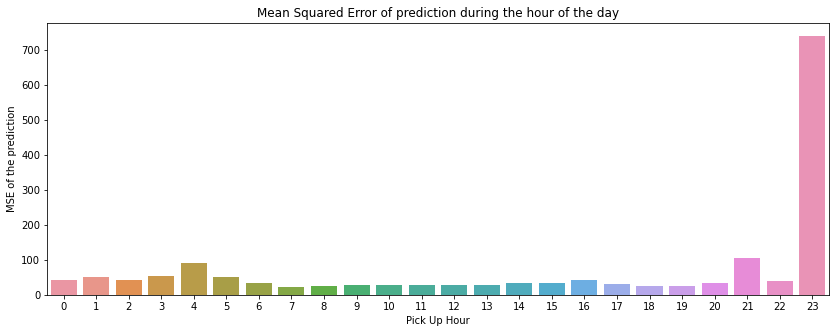

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hour , mse_list, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('MSE of the prediction')
_ = ax.set_title('Mean Squared Error of prediction during the hour of the day')

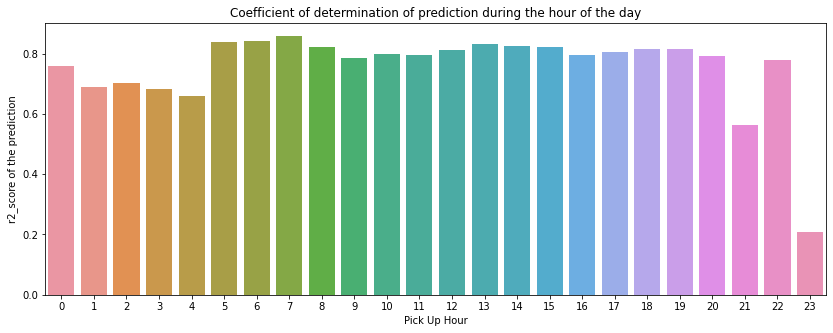

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hour , r2_list, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('r2_score of the prediction')
_ = ax.set_title('Coefficient of determination of prediction during the hour of the day')

### Now Let's try on a specific location

In [64]:
good_PU_locations_lst = list(good_PU_locations.index)

In [65]:
type(good_PU_locations_lst)

list

In [66]:
#Newark_df = PU_hour_df.query('PULocationID in @good_PU_locations_lst') #[1, 27, 109, 172, 204, 265]
location_id = 3
Newark_df = PU_hour_df.query('PULocationID == @location_id')

In [67]:
Newark_df.shape[0]

175

In [68]:
mse_list = []
r2_list = []
hour = []

for i in range(24):
    X_hour = Newark_df[Newark_df.PU_hour == i]
    mse,r2 = hourly_correlation(X_hour)
    
    mse_list.append(mse)
    r2_list.append(r2)
    hour.append(i)

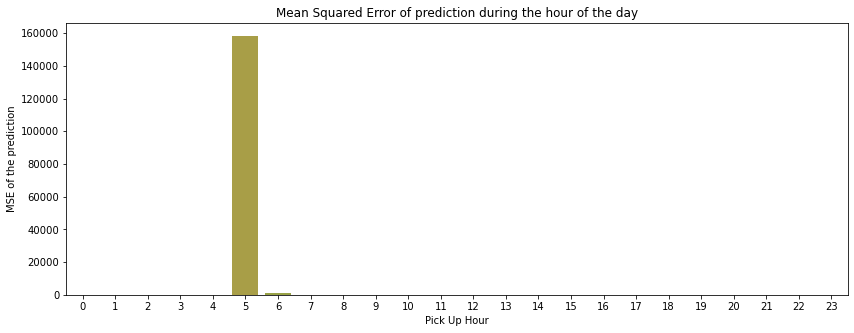

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hour , mse_list, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('MSE of the prediction')
_ = ax.set_title('Mean Squared Error of prediction during the hour of the day')

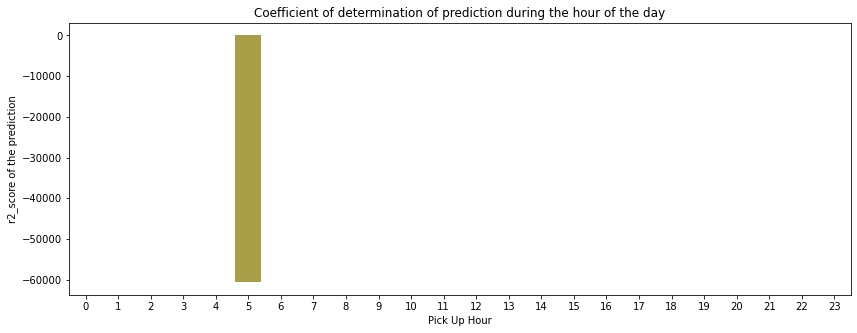

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hour , r2_list, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('r2_score of the prediction')
_ = ax.set_title('Coefficient of determination of prediction during the hour of the day')

### Now let's try to build a data structure of the predictability based on location and hour

In [71]:
good_locations_test = good_PU_locations_lst[:10]

In [72]:
good_locations_test

[1, 5, 6, 14, 15, 20, 23, 27, 57, 70]

In [73]:
import math

In [74]:
mse_dict = dict()
r2_dict = dict()

for hour in range(24):
    mse_dict[hour] = dict()
    r2_dict[hour] = dict()

for location_id in good_locations_test:
    #print(location_id)
    
    location_df = PU_hour_df.query('PULocationID == @location_id')
    
    for hour in range(24):
        X_hour = location_df[location_df.PU_hour == hour]
        mse,r2 = hourly_correlation(X_hour)
        
        if math.isnan(mse):
            continue
        else:
            mse_dict[hour][mse] = location_id
            r2_dict[hour][mse] = location_id

In [75]:
for hour in range(24):
    print(min(mse_dict[hour]))

462.196297867723
309.26873766964974
0.4875169288456852
435.53416023932084
28.055605697961294
0.029685559705976663
7.305504577739946
2.5159464397812754
0.137024100802467
20.31876751769253
17.09476213550694
0.8687469835588228
2.163743996504005
4.176950574669546
2.2019204083358805
13.816623799412346
0.537486301727294
64.4104627977803
49.27077159419313
0.0657190445307072
776.4498109622574
18.027536699393426
51.01674134550182
5.22511969431205


In [76]:
zones_df.loc[[mse_dict[0][min(mse_dict[0])]]]

,Borough,Zone,service_zone
LocationID,,,
14,Brooklyn,Bay Ridge,Boro Zone


In [77]:
zones_df.loc[[mse_dict[0][min(mse_dict[0])]]][['Borough','Zone']]

,Borough,Zone
LocationID,,
14,Brooklyn,Bay Ridge


In [78]:
print(zones_df.loc[[mse_dict[0][min(mse_dict[0])]]][['Borough','Zone']])

             Borough       Zone
LocationID                     
14          Brooklyn  Bay Ridge


In [79]:
for hour in range(24):
    print(zones_df.loc[[mse_dict[hour][min(mse_dict[hour])]]][['Borough','Zone']])

             Borough       Zone
LocationID                     
14          Brooklyn  Bay Ridge
             Borough       Zone
LocationID                     
14          Brooklyn  Bay Ridge
           Borough     Zone
LocationID                 
20           Bronx  Belmont
           Borough           Zone
LocationID                       
70          Queens  East Elmhurst
           Borough           Zone
LocationID                       
70          Queens  East Elmhurst
                  Borough                     Zone
LocationID                                        
6           Staten Island  Arrochar/Fort Wadsworth
             Borough       Zone
LocationID                     
14          Brooklyn  Bay Ridge
             Borough       Zone
LocationID                     
14          Brooklyn  Bay Ridge
           Borough     Zone
LocationID                 
20           Bronx  Belmont
           Borough           Zone
LocationID                       
70          Queens  Eas

In [92]:
def get_best_location_by_mse(hour):
    return pd.DataFrame(zones_df.loc[[mse_dict[hour][min(mse_dict[hour])]]][['Borough','Zone']])

In [95]:
def get_best_location_by_r2(hour):
    return pd.DataFrame(zones_df.loc[[r2_dict[hour][min(r2_dict[hour])]]][['Borough','Zone']])

In [103]:
hour = 2
get_best_location_by_mse(hour)

,Borough,Zone
LocationID,,
20,Bronx,Belmont


In [104]:
get_best_location_by_r2(hour)

,Borough,Zone
LocationID,,
20,Bronx,Belmont


In [107]:
hour13 = 13
get_best_location_by_mse(hour13)

,Borough,Zone
LocationID,,
15,Queens,Bay Terrace/Fort Totten


In [108]:
get_best_location_by_r2(hour13)

,Borough,Zone
LocationID,,
15,Queens,Bay Terrace/Fort Totten
